<a href="https://colab.research.google.com/github/Dedeepyamaddi/Data-Analytics/blob/main/Unveiling_the_Android_App_Market_Analyzing_Google_Play_Store_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Original Shape: (9659, 14)


<ipython-input-26-1322752647>:33: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Size'].fillna(df['Size'].mean(), inplace=True)


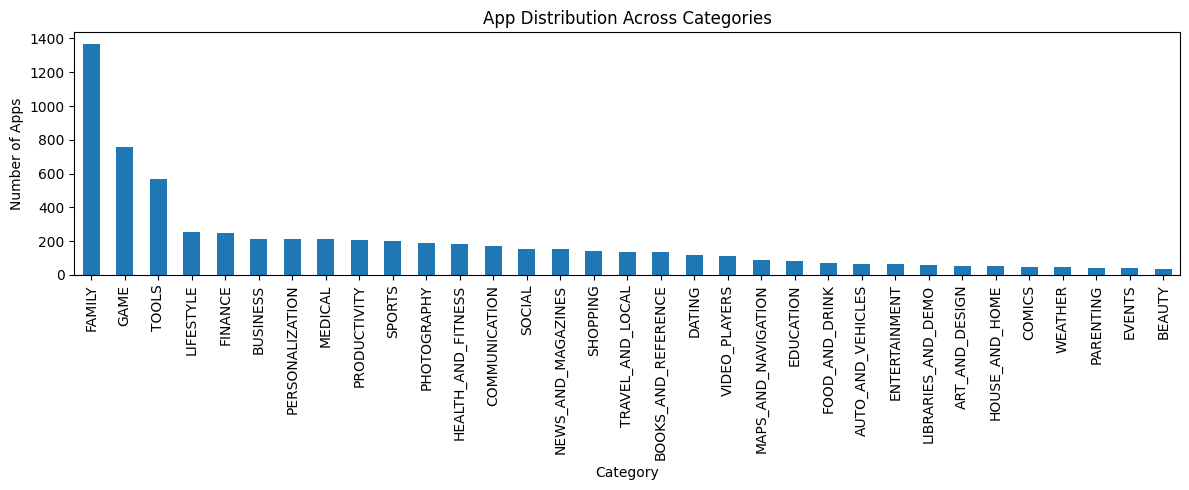

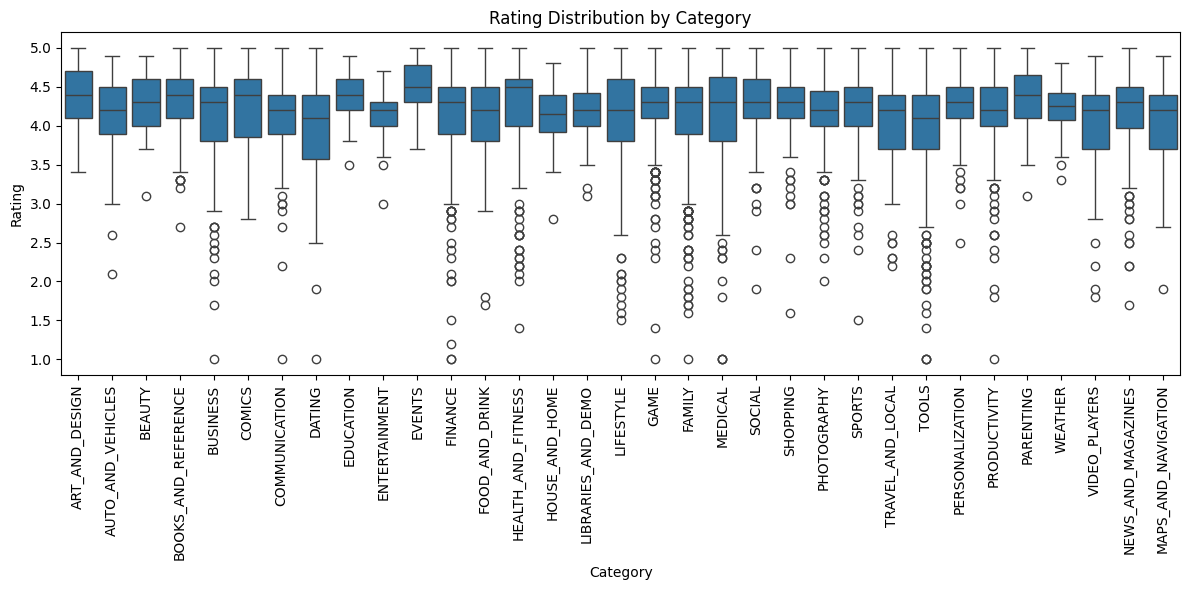

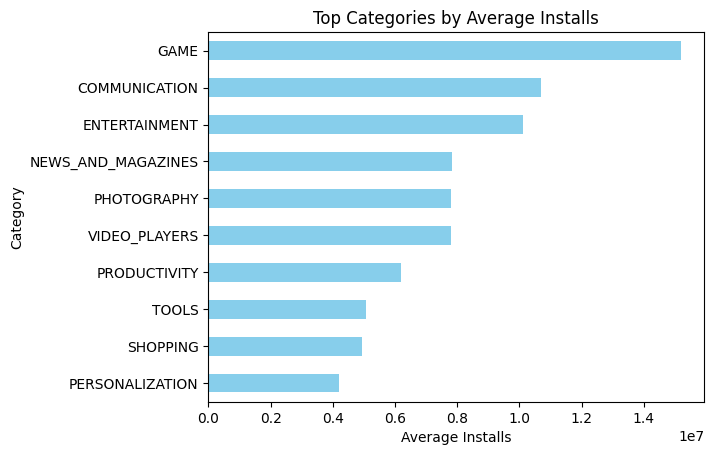

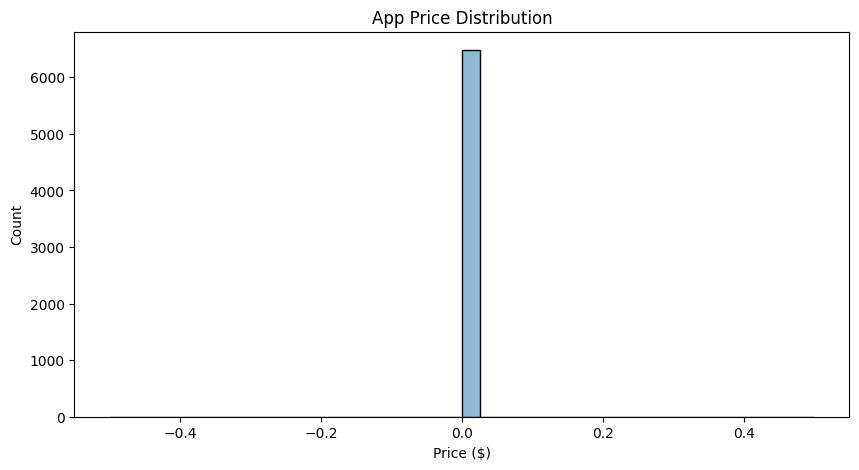

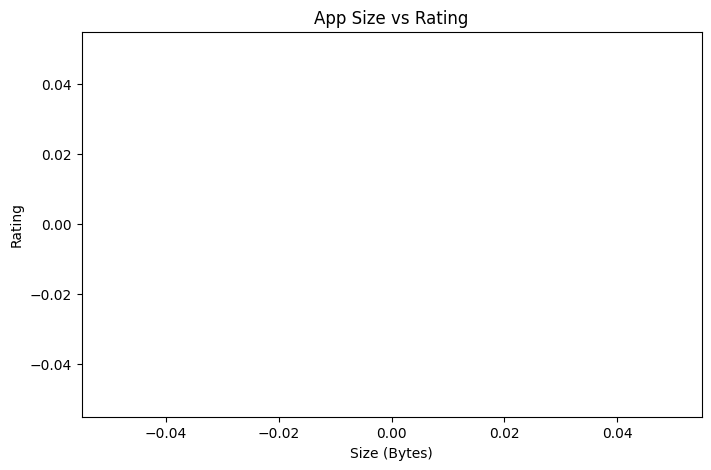

In [ ]:
# 1. Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Data
df = pd.read_csv("/content/apps.csv")
print("Original Shape:", df.shape)
df.head()

# 3. Data Cleaning
df.drop_duplicates(inplace=True)
df.dropna(how='any', inplace=True)

# Remove rows with non-numeric 'Rating'
df = df[df['Rating'].apply(lambda x: str(x).replace('.', '', 1).isdigit())]
df['Rating'] = df['Rating'].astype(float)

# Clean 'Size' column
def convert_size(size):
    if 'M' in size:
        return float(size.replace('M', '')) * 1_000_000
    elif 'k' in size:
        return float(size.replace('k', '')) * 1_000
    elif size == 'Varies with device' or size == 'Free':
        return np.nan
    else:
        return np.nan

df['Size'] = df['Size'].astype(str) # Explicitly convert 'Size' column to string type
df['Size'] = df['Size'].apply(convert_size)
df['Size'].fillna(df['Size'].mean(), inplace=True)

# Convert 'Installs'
df['Installs'] = df['Installs'].str.replace('[+,]', '', regex=True).astype(int)

# Convert 'Price'
df['Price'] = df['Price'].str.replace('$', '', regex=True)
df['Price'] = pd.to_numeric(df['Price'], errors='coerce')
df.dropna(subset=['Price'], inplace=True)


# 4. Category Distribution
plt.figure(figsize=(12, 5))
df['Category'].value_counts().plot(kind='bar')
plt.title("App Distribution Across Categories")
plt.xlabel("Category")
plt.ylabel("Number of Apps")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

# 5. Ratings by Category
plt.figure(figsize=(12, 6))
sns.boxplot(x='Category', y='Rating', data=df)
plt.xticks(rotation=90)
plt.title("Rating Distribution by Category")
plt.tight_layout()
plt.show()

# 6. Popularity (Installs)
top_installed = df.groupby('Category')['Installs'].mean().sort_values(ascending=False)
top_installed[:10].plot(kind='barh', color='skyblue')
plt.xlabel("Average Installs")
plt.title("Top Categories by Average Installs")
plt.gca().invert_yaxis()
plt.show()

# 7. Price Distribution
plt.figure(figsize=(10, 5))
sns.histplot(df['Price'], bins=40, kde=True)
plt.title("App Price Distribution")
plt.xlabel("Price ($)")
plt.show()

# 8. Size vs Rating
plt.figure(figsize=(8, 5))
sns.scatterplot(x='Size', y='Rating', data=df)
plt.title("App Size vs Rating")
plt.xlabel("Size (Bytes)")
plt.ylabel("Rating")
plt.show()

# 9. Sentiment Analysis (Optional)
# If you have 'Reviews.csv' from the dataset:
# reviews = pd.read_csv("googleplaystore_user_reviews.csv")
# reviews.dropna(inplace=True)
# from textblob import TextBlob
# reviews['Sentiment_Score'] = reviews['Translated_Review'].apply(lambda x: TextBlob(x).sentiment.polarity)
# reviews.groupby('App')['Sentiment_Score'].mean().sort_values(ascending=False).head(10)